In [1]:
import pandas as pd
import numpy as np
import pickle

# Ensemble learning
Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.

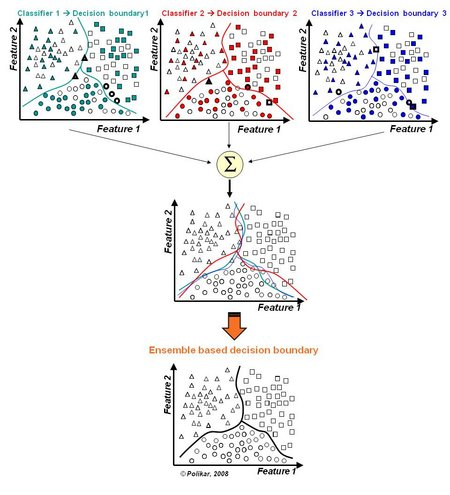

Standard Ensemble Learning Strategies
Ensemble learning refers to algorithms that combine the predictions from two or more models.
Although there is nearly an unlimited number of ways that this can be achieved, there are perhaps three classes of ensemble learning techniques that are most commonly discussed and used in practice. Their popularity is due in large part to their ease of implementation and success on a wide range of predictive modeling problems.
A rich collection of ensemble-based classifiers have been developed over the last several years. However, many of these are some variation of the select few well- established algorithms whose capabilities have also been extensively tested and widely reported.
— Page 11, Ensemble Machine Learning, 2012.
Given their wide use, we can refer to them as “standard” ensemble learning strategies; they are:
1.	Bagging.
2.	Stacking.
3.	Boosting.
There is an algorithm that describes each approach, although more importantly, the success of each approach has spawned a myriad of extensions and related techniques. As such, it is more useful to describe each as a class of techniques or standard approaches to ensemble learning.
Rather than dive into the specifics of each method, it is useful to step through, summarize, and contrast each approach. It is also important to remember that although discussion and use of these methods are pervasive, these three methods alone do not define the extent of ensemble learning.
Next, let’s take a closer look at bagging.
Bagging Ensemble Learning
Bootstrap aggregation, or bagging for short, is an ensemble learning method that seeks a diverse group of ensemble members by varying the training data.
The name Bagging came from the abbreviation of Bootstrap AGGregatING. As the name implies, the two key ingredients of Bagging are bootstrap and aggregation.
— Page 48, Ensemble Methods, 2012.
This typically involves using a single machine learning algorithm, almost always an unpruned decision tree, and training each model on a different sample of the same training dataset. The predictions made by the ensemble members are then combined using simple statistics, such as voting or averaging.
The diversity in the ensemble is ensured by the variations within the bootstrapped replicas on which each classifier is trained, as well as by using a relatively weak classifier whose decision boundaries measurably vary with respect to relatively small perturbations in the training data.
— Page 11, Ensemble Machine Learning, 2012.
Key to the method is the manner in which each sample of the dataset is prepared to train ensemble members. Each model gets its own unique sample of the dataset.
Examples (rows) are drawn from the dataset at random, although with replacement.
Bagging adopts the bootstrap distribution for generating different base learners. In other words, it applies bootstrap sampling to obtain the data subsets for training the base learners.
— Page 48, Ensemble Methods, 2012.
Replacement means that if a row is selected, it is returned to the training dataset for potential re-selection in the same training dataset. This means that a row of data may be selected zero, one, or multiple times for a given training dataset.
This is called a bootstrap sample. It is a technique often used in statistics with small datasets to estimate the statistical value of a data sample. By preparing multiple different bootstrap samples and estimating a statistical quantity and calculating the mean of the estimates, a better overall estimate of the desired quantity can be achieved than simply estimating from the dataset directly.
In the same manner, multiple different training datasets can be prepared, used to estimate a predictive model, and make predictions. Averaging the predictions across the models typically results in better predictions than a single model fit on the training dataset directly.
We can summarize the key elements of bagging as follows:
•	Bootstrap samples of the training dataset.
•	Unpruned decision trees fit on each sample.
•	Simple voting or averaging of predictions.
In summary, the contribution of bagging is in the varying of the training data used to fit each ensemble member, which, in turn, results in skillful but different models.
 
Bagging Ensemble
It is a general approach and easily extended. For example, more changes to the training dataset can be introduced, the algorithm fit on the training data can be replaced, and the mechanism used to combine predictions can be modified.
Many popular ensemble algorithms are based on this approach, including:
•	Bagged Decision Trees (canonical bagging)
•	Random Forest
•	Extra Trees


# Ramdon Forest

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 

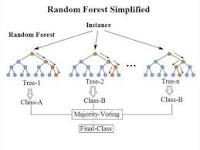

In [2]:
with open('digits.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
dim = 8

In [3]:
with open('digits.txt','wb') as f:
    pickle.dump(data,f)

In [5]:
X[0].reshape((dim,dim)), y[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

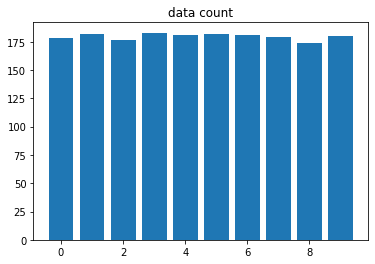

In [18]:
num_count = pd.value_counts(y).sort_index()
plt.bar(list(num_count.index),list(num_count.values))
plt.title('data count')
plt.show()

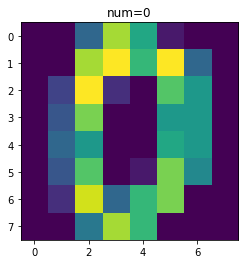

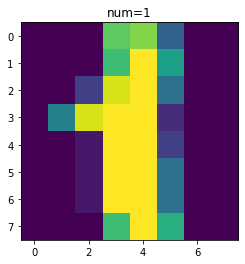

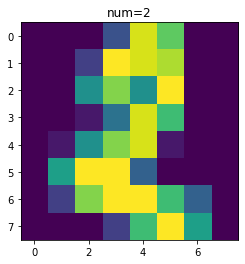

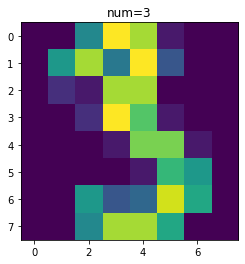

In [6]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.imshow(X[i].reshape((dim,dim)))
    plt.title('num=%s'%y[i])
    plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class myRF:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = make_pipeline(
            StandardScaler(),
            RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=None,random_state=666))


    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)
    
    def predict_prob(self, X):
        '''
        predict prob
        '''
        return self.clf.predict_proba(X)

In [8]:
def eval_result(y, pre_y):
    '''
    eval
    :param y:
    :param pre_y:
    :return:
    '''
    lables = list(set(y))
    result = dict()
    for l in lables:
        t_r = dict()
        TP = np.logical_and(y==pre_y, y==l).sum()
        FP = np.logical_and(y!=pre_y, y!=l).sum()
        FN = np.logical_and(y!=pre_y, y==l).sum()
        t_r['precision'] = TP/(TP+FP)
        t_r['recall'] = TP/(TP+FN)
        t_r['F1'] = 2*t_r['precision']*t_r['recall']/(t_r['precision']+t_r['recall'])

        result[l] = t_r
    return result

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

### Setting training and testing:

In [10]:
model = myRF()
model.train(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50, random_state=666))])

In [11]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
eval_train

{0: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 1: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 2: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 3: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 4: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 5: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 6: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 7: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 8: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0},
 9: {'precision': 1.0, 'recall': 1.0, 'F1': 1.0}}

### train confusion matrix: 

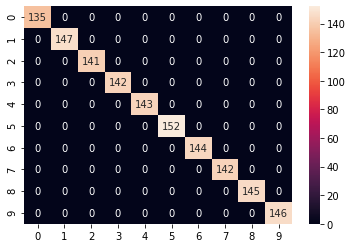

In [34]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_train, pre_y_train, list(range(10)), save_path='./train_confusion_matrix.jpg')

In [12]:
pre_y_test = model.predict(X_test)
prob_y_test = model.predict_prob(X_test)
eval_test = eval_result(y_test, pre_y_test)
eval_test

{0: {'precision': 0.8367346938775511,
  'recall': 0.9534883720930233,
  'F1': 0.8913043478260869},
 1: {'precision': 0.7777777777777778, 'recall': 1.0, 'F1': 0.8750000000000001},
 2: {'precision': 0.8095238095238095,
  'recall': 0.9444444444444444,
  'F1': 0.8717948717948718},
 3: {'precision': 0.8163265306122449,
  'recall': 0.975609756097561,
  'F1': 0.888888888888889},
 4: {'precision': 0.8043478260869565,
  'recall': 0.9736842105263158,
  'F1': 0.8809523809523809},
 5: {'precision': 0.75, 'recall': 1.0, 'F1': 0.8571428571428571},
 6: {'precision': 0.7872340425531915, 'recall': 1.0, 'F1': 0.880952380952381},
 7: {'precision': 0.8, 'recall': 0.972972972972973, 'F1': 0.8780487804878049},
 8: {'precision': 0.7714285714285715,
  'recall': 0.9310344827586207,
  'F1': 0.8437500000000001},
 9: {'precision': 0.7857142857142857,
  'recall': 0.9705882352941176,
  'F1': 0.8684210526315789}}

### Test Confusion Matrix:

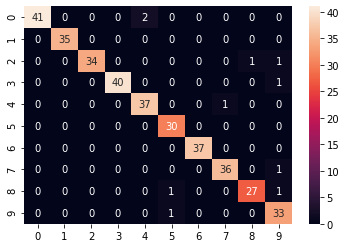

In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_test, pre_y_test, list(range(10)), save_path='./test_confusion_matrix.jpg')

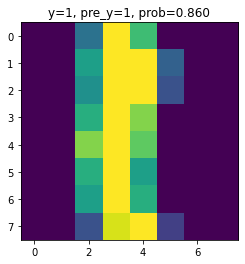

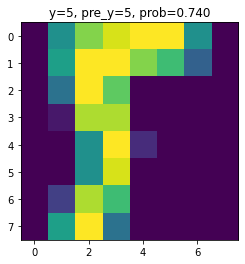

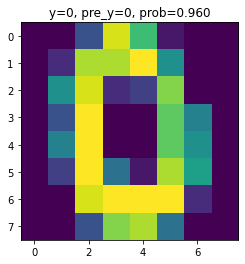

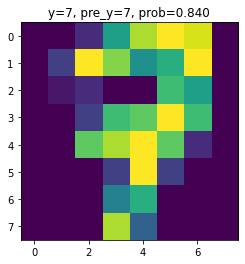

In [13]:
for i in range(4):
    plt.imshow(X_test[i].reshape((dim,dim)))
    plt.title('y=%s, pre_y=%s, prob=%.3f'%(y_test[i], pre_y_test[i], prob_y_test[i][y_test[i]]))
    plt.show()